In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('D:/data/Cancer/cancer.csv')

In [5]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Outcome                    0
dtype: int64

In [3]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Outcome
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


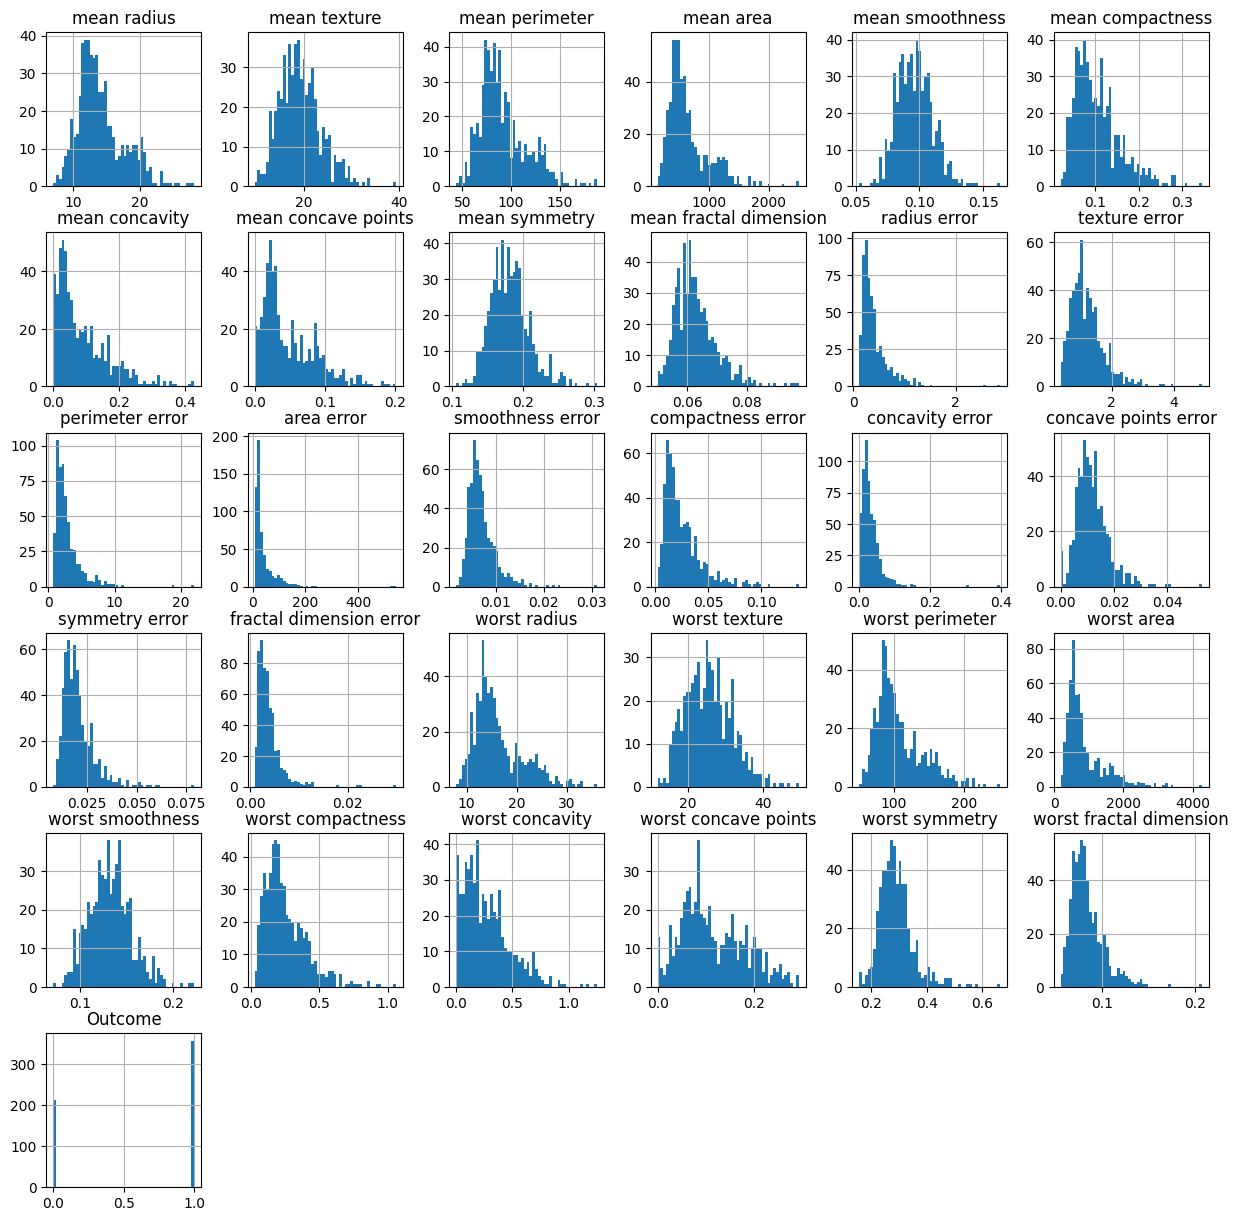

In [7]:
df.hist(bins=50,figsize=(15,15))
plt.show()

In [32]:
X = np.array(df.drop('Outcome',axis=1))
y = np.array(df['Outcome'])

smote = SMOTE(random_state=42)
X_resampled,y_resampled = smote.fit_resample(X,y)

Xtrain, Xtest, ytrain, ytest = train_test_split(X_resampled,y_resampled,train_size=0.8,random_state=42)

std = preprocessing.StandardScaler()
Xtrain_scaled = std.fit_transform(Xtrain)
Xtest_scaled = std.fit_transform(Xtest)

model = SVC(C = 10, gamma = 'scale', kernel = 'rbf',random_state=42)
model.fit(Xtrain_scaled,ytrain)

# # پیش‌بینی احتمالات به جای برچسب‌ها
# y_probs = model.predict_proba(Xtest_scaled)[:, 1]  # احتمال برای کلاس 1 (مثبت)

# # تعیین آستانه (به جای 0.5، مثلاً 0.4)
# threshold = 0.4  # کاهش آستانه برای افزایش حساسیت
# pred = (y_probs >= threshold).astype(int)
pred = model.predict(Xtest_scaled)

# محاسبه و نمایش متریک‌ها
print(f'F1-Score: {metrics.f1_score(ytest, pred)}')
print(f'Precision-Score: {metrics.precision_score(ytest, pred)}')
print(f'Recall-Score: {metrics.recall_score(ytest, pred)}')
print(f'accuracy-Score: {metrics.accuracy_score(ytest, pred)}')

F1-Score: 0.9855072463768116
Precision-Score: 0.9855072463768116
Recall-Score: 0.9855072463768116
accuracy-Score: 0.986013986013986


In [33]:
scores = cross_val_score(model, Xtrain_scaled, ytrain, cv=10, scoring='f1')
print(f'Cross-Validation F1-Scores: {scores}')
print(f'Mean F1-Score: {scores.mean()}')

Cross-Validation F1-Scores: [0.98305085 0.94545455 0.96428571 1.         0.98305085 0.94736842
 0.98305085 0.98245614 0.96666667 1.        ]
Mean F1-Score: 0.9755384030183316


In [27]:
models = {
    "KNeighborsClassifier":KNeighborsClassifier(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "SVC":SVC()
}
for name,model_object in models.items():
    model = model_object
    model.fit(Xtrain_scaled,ytrain)
    pred = model.predict(Xtest_scaled)
    print(f"{name}:{metrics.f1_score(ytest,pred)}")

KNeighborsClassifier:0.9629629629629629
DecisionTreeClassifier:0.935251798561151
RandomForestClassifier:0.9705882352941176
GradientBoostingClassifier:0.9710144927536232
SVC:0.9928057553956835


In [31]:
# تعریف مدل KNN
svc = SVC()

# تعریف فضای جستجو برای هایپرپارامترها
param_grid = {
    'C': [0.1, 1, 10, 100],  # پارامتر منظم‌سازی
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # نوع کرنل
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]  # پارامتر کرنل
}


# استفاده از GridSearchCV برای جستجوی بهترین ترکیب پارامترها
grid_search = GridSearchCV(svc, param_grid, cv=10, scoring='f1')
grid_search.fit(Xtrain_scaled, ytrain)

# بهترین پارامترها
best_params = grid_search.best_params_
print(f"بهترین پارامترها: {best_params}")

# ارزیابی مدل با بهترین پارامترها
best_model = grid_search.best_estimator_
pred = best_model.predict(Xtest_scaled)

بهترین پارامترها: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [34]:
import joblib 
joblib.dump(model,'D:/data/Cancer/cancer.sav')

['D:/data/Cancer/cancer.sav']